# TASK-5

## Stock-Market-Prediction-using-Numerical-and-Textual-Analysis

### Author- Sunny Kumar Tripathi

## Step 1: Importing necessary python package

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 2: Importing dataset

In [2]:
# Importing here dataset from url
df_stock = pd.read_csv('NSE.csv')

Date          0
Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64


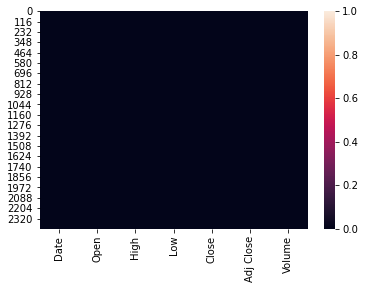

In [3]:
#Data with null values
print(df_stock.isnull().sum())
sns.heatmap(df_stock.isnull())
# One  null values 

In [4]:
# data shape and size and other information
print('Shape of Data is:',df_stock.shape)
print('Size of Data is:',df_stock.size)
print('Dimension of Data is:',df_stock.ndim)
print('Various Insights of Data:\n')
df_stock.info()

Shape of Data is: (2432, 7)
Size of Data is: 17024
Dimension of Data is: 2
Various Insights of Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2432 non-null   object 
 1   Open       2409 non-null   float64
 2   High       2409 non-null   float64
 3   Low        2409 non-null   float64
 4   Close      2409 non-null   float64
 5   Adj Close  2409 non-null   float64
 6   Volume     2409 non-null   float64
dtypes: float64(6), object(1)
memory usage: 133.1+ KB


In [5]:
#Filling  na
df_stock.fillna( method ='ffill',axis="rows",inplace = True)

In [6]:
# Data Columns
print('Columns in Data ----',df_stock.columns)

Columns in Data ---- Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


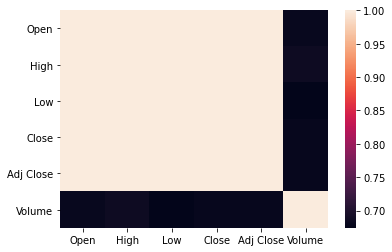

In [7]:
#Correlation Between data

df_stock.corr()
sns.heatmap(df_stock.corr())

In [8]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2.432000e+03
mean,8256.077328,8298.136313,8199.808959,8248.864087,8248.864087,2.210621e+05
std,2259.432369,2264.040697,2248.059984,2255.881850,2255.881850,2.156513e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,5930.274903,5953.487671,5886.087646,5918.687622,5918.687622,1.163750e+05
50%,8237.924805,8282.850098,8187.174805,8236.250000,8236.250000,1.726000e+05
75%,10388.300293,10430.424805,10329.837402,10387.137207,10387.137207,2.667500e+05
max,12430.500000,12430.500000,12321.400391,12362.299805,12362.299805,1.811000e+06


# Step 3: Plot & Visualization

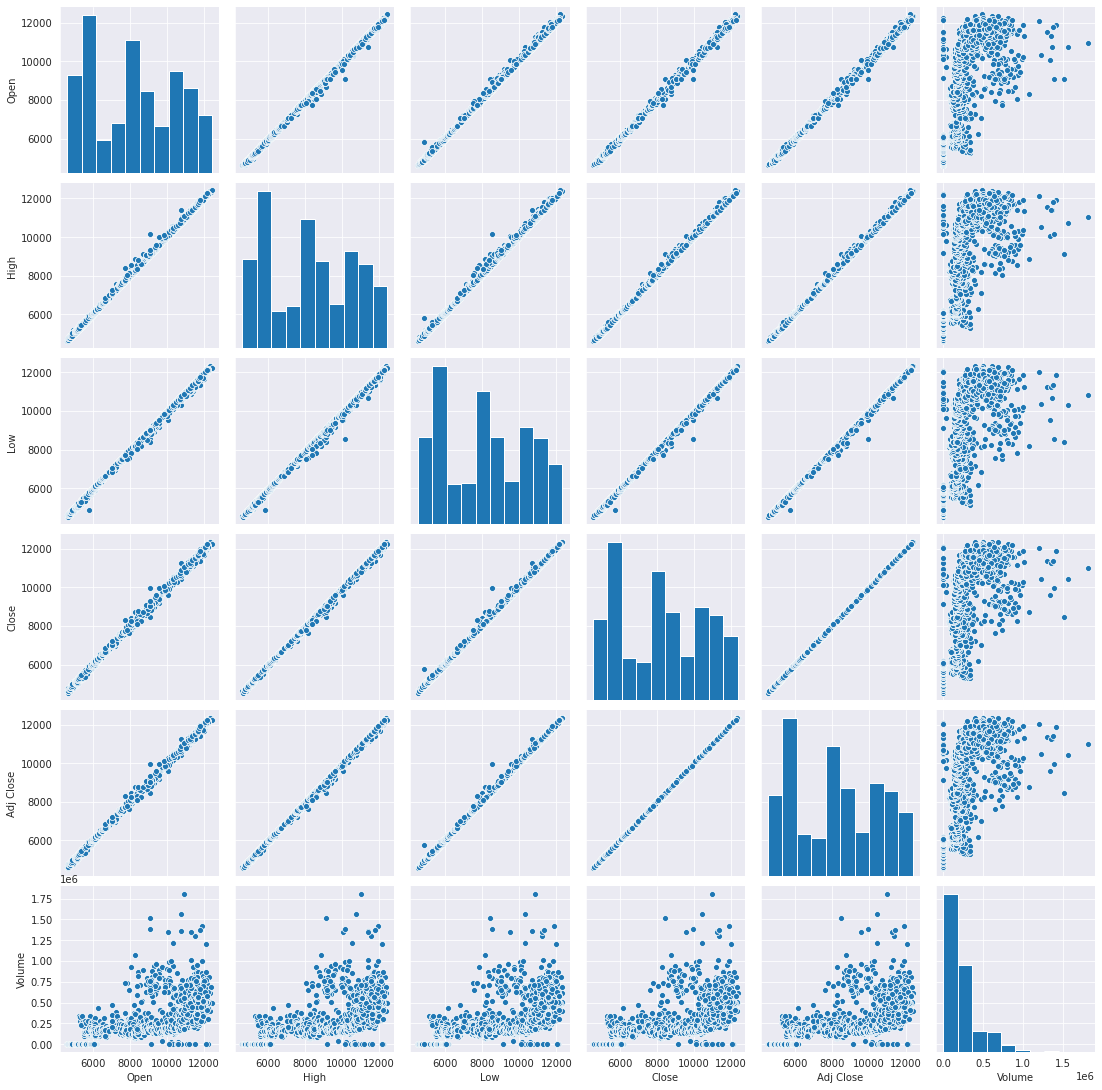

In [9]:
#Using Scatter/pair plot relationship between variables
sns.set_style('darkgrid')
sns.pairplot(df_stock)
plt.show()

In [10]:
#Converting Date column to datetime datatype
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
print(df_stock.info())
print(df_stock[0:5])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2432 non-null   datetime64[ns]
 1   Open       2432 non-null   float64       
 2   High       2432 non-null   float64       
 3   Low        2432 non-null   float64       
 4   Close      2432 non-null   float64       
 5   Adj Close  2432 non-null   float64       
 6   Volume     2432 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 133.1 KB
None
        Date         Open         High          Low        Close    Adj Close  \
0 2011-01-03  6177.450195  6178.549805  6147.200195  6157.600098  6157.600098   
1 2011-01-04  6172.750000  6181.049805  6124.399902  6146.350098  6146.350098   
2 2011-01-05  6141.350098  6141.350098  6062.350098  6079.799805  6079.799805   
3 2011-01-06  6107.000000  6116.149902  6022.299805  6048.250000  6048.250000   


Text(0, 0.5, 'Close')

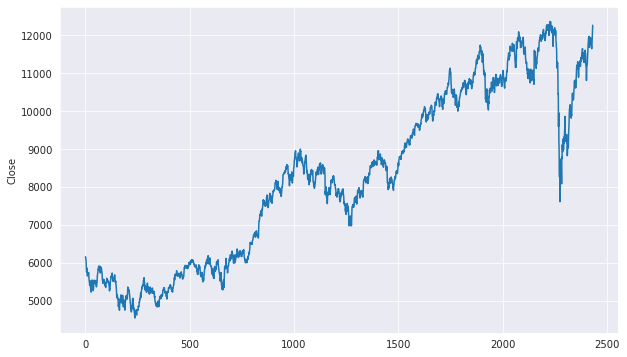

In [11]:
plt.figure(figsize=(10, 6))
df_stock['Close'].plot()
plt.ylabel('Close')

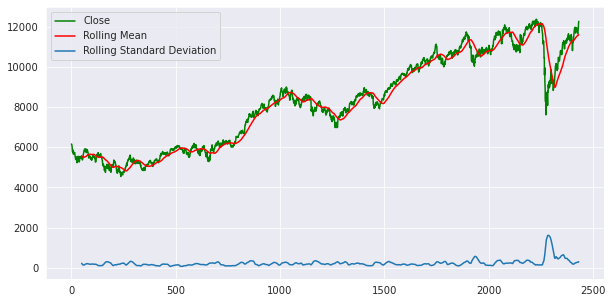

In [12]:
#Plotting moving average
close = df_stock['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 5))
df_stock['Close'].plot(color = 'green', label = 'Close')
ma.plot(color = 'red', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Returns')

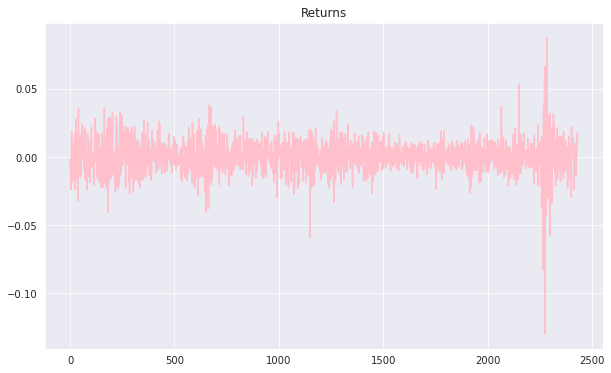

In [13]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'pink')
plt.title("Returns")

In [14]:
train = df_stock[:1700]
test = df_stock[1700:]
train.shape
test.shape

(732, 7)

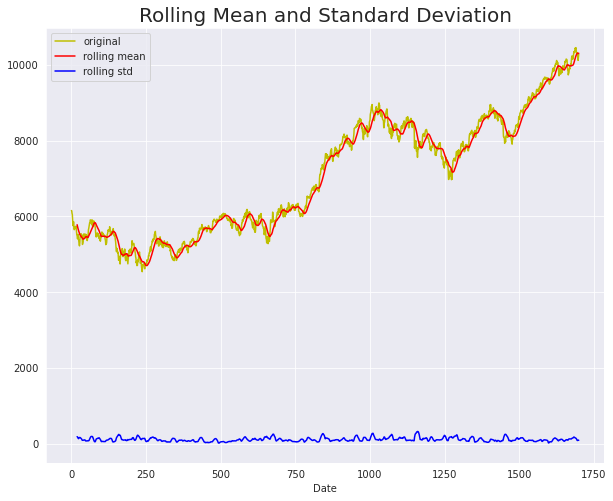

Results of dickey fuller test
ADF Test Statistic : 0.04973895343784983
p-value : 0.9624572011282805
#Lags Used : 1
Number of Observations Used : 1698
Weak evidence against null hypothesis, time series is non-stationary 


In [15]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
#Stationarity test
def test_stationarity(timeseries):
  #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()
    #Plot rolling statistics:
    plt.figure(figsize = (10,8))
    plt.plot(timeseries, color = 'y', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'b', label = 'rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
    plt.show(block = False)
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])




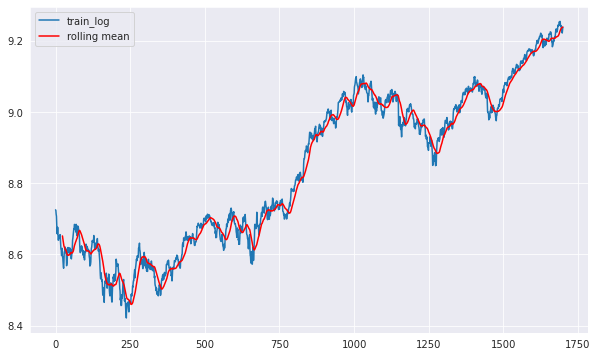

In [16]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log, label="train_log") 
plt.plot(mav, color = 'red',label="rolling mean")
plt.legend()
plt.show()

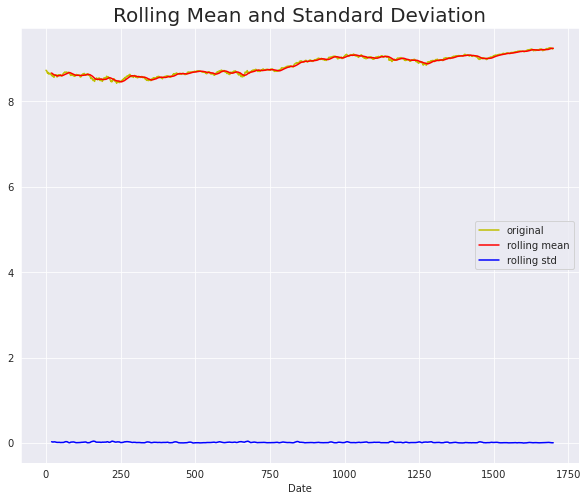

Results of dickey fuller test
ADF Test Statistic : -0.2819162467854093
p-value : 0.9280267702254008
#Lags Used : 1
Number of Observations Used : 1698
Weak evidence against null hypothesis, time series is non-stationary 


In [17]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)
test_stationarity(train_log)

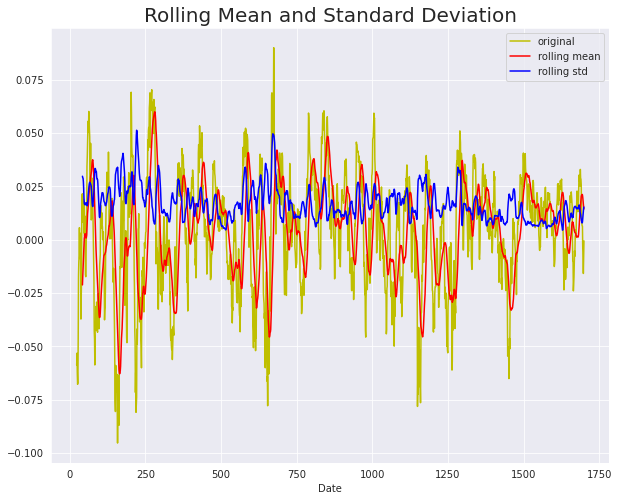

Results of dickey fuller test
ADF Test Statistic : -8.924661531228978
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
p-value : 1.0189628894875401e-14
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
#Lags Used : 9
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Number of Observations Used : 1667
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Weak evidence against null hypothesis, time series is non-stationary 


In [18]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [19]:
from statsmodels.tsa.arima_model import ARIMA

#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
pred = model.predict(n_periods = len(test))
pred = pd.DataFrame(pred,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10826.824, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10819.677, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10829.905, Time=1.81 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10830.393, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10820.132, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10828.594, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10828.661, Time=0.87 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10828.313, Time=2.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10831.078, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-10829.257, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-10829.311, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-10830.600, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-10828.634, Time=0.42 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.304 sec

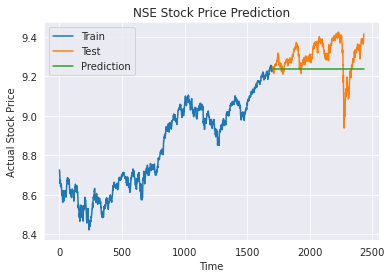

In [20]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(pred, label='Prediction')
plt.title('NSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE =", mean_absolute_error(test_log,pred))
print("MSE =", mean_squared_error(test_log, pred))
print("RMSE =", np.sqrt(mean_squared_error(test_log, pred)))
print("R2 score =",r2_score(test_log, pred))

MAE = 0.08274187239566584
MSE = 0.009625166411025577
RMSE = 0.09810793245719521
R2 score = -0.6529581109673528


In [22]:
df_stock.to_csv('Stock_data.csv',index=False)